# Loan Default Prediction Using Machine Learning

## Project Overview

##### This project aims to predict the likelihood of a customer defaulting on a loan using supervised machine learning models. Loan default prediction is a critical use case in the financial sector as it helps lenders manage credit risk and make informed lending decisions. This project involves building and evaluating multiple classification models to identify risky applicants before loan disbursement.

## Goal

##### To build a predictive model that can classify whether a customer will default on their loan based on their demographic and financial features.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# #load dataset
# df = pd.read_csv("Loan_Default.csv")
# df.head()

#load dataset
file_id = '1nxF4dgqrZ2uKrB3V4VU9CgJaQ3Ap15Og'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.shape

(148670, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [9]:
#Will be preferred to convert all features to lower case
df.columns= df.columns.str.lower()
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

### Feature Filtering Based on Real-World Lending Logic

To align the model with actual loan approval criteria used by financial institutions, we retained features corresponding to:

- Credit score
- Income and DTI
- Property value and LTV
- Loan amount, term, and upfront charges

This reduces noise and potential leakage, making the model simpler and more interpretable.


In [10]:
# we can drpo 'id' ,'loan_limit' , 'gender' ,'approv_in_adv' ,'loan_purpose' ,'open_credit' ,'business_or_commercial'  because they don't add any valiable information
# we can drop 'year' as it includes only one year 2019

columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [11]:
df.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [12]:
df.shape

(148670, 10)

### Check for Duplicates

In [13]:
df.duplicated().sum()

6

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df.shape

(148664, 10)

## Check missing values

In [16]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percentage})
print(missing_df)

                  Missing Values    Percent
age                          200   0.134532
credit_score                   0   0.000000
dtir1                      24115  16.221143
income                      9146   6.152128
loan_amount                    0   0.000000
loan_type                      0   0.000000
property_value             15096  10.154442
rate_of_interest           36437  24.509632
status                         0   0.000000
term                          41   0.027579


## Visualize Missing Data (Before Imputation)

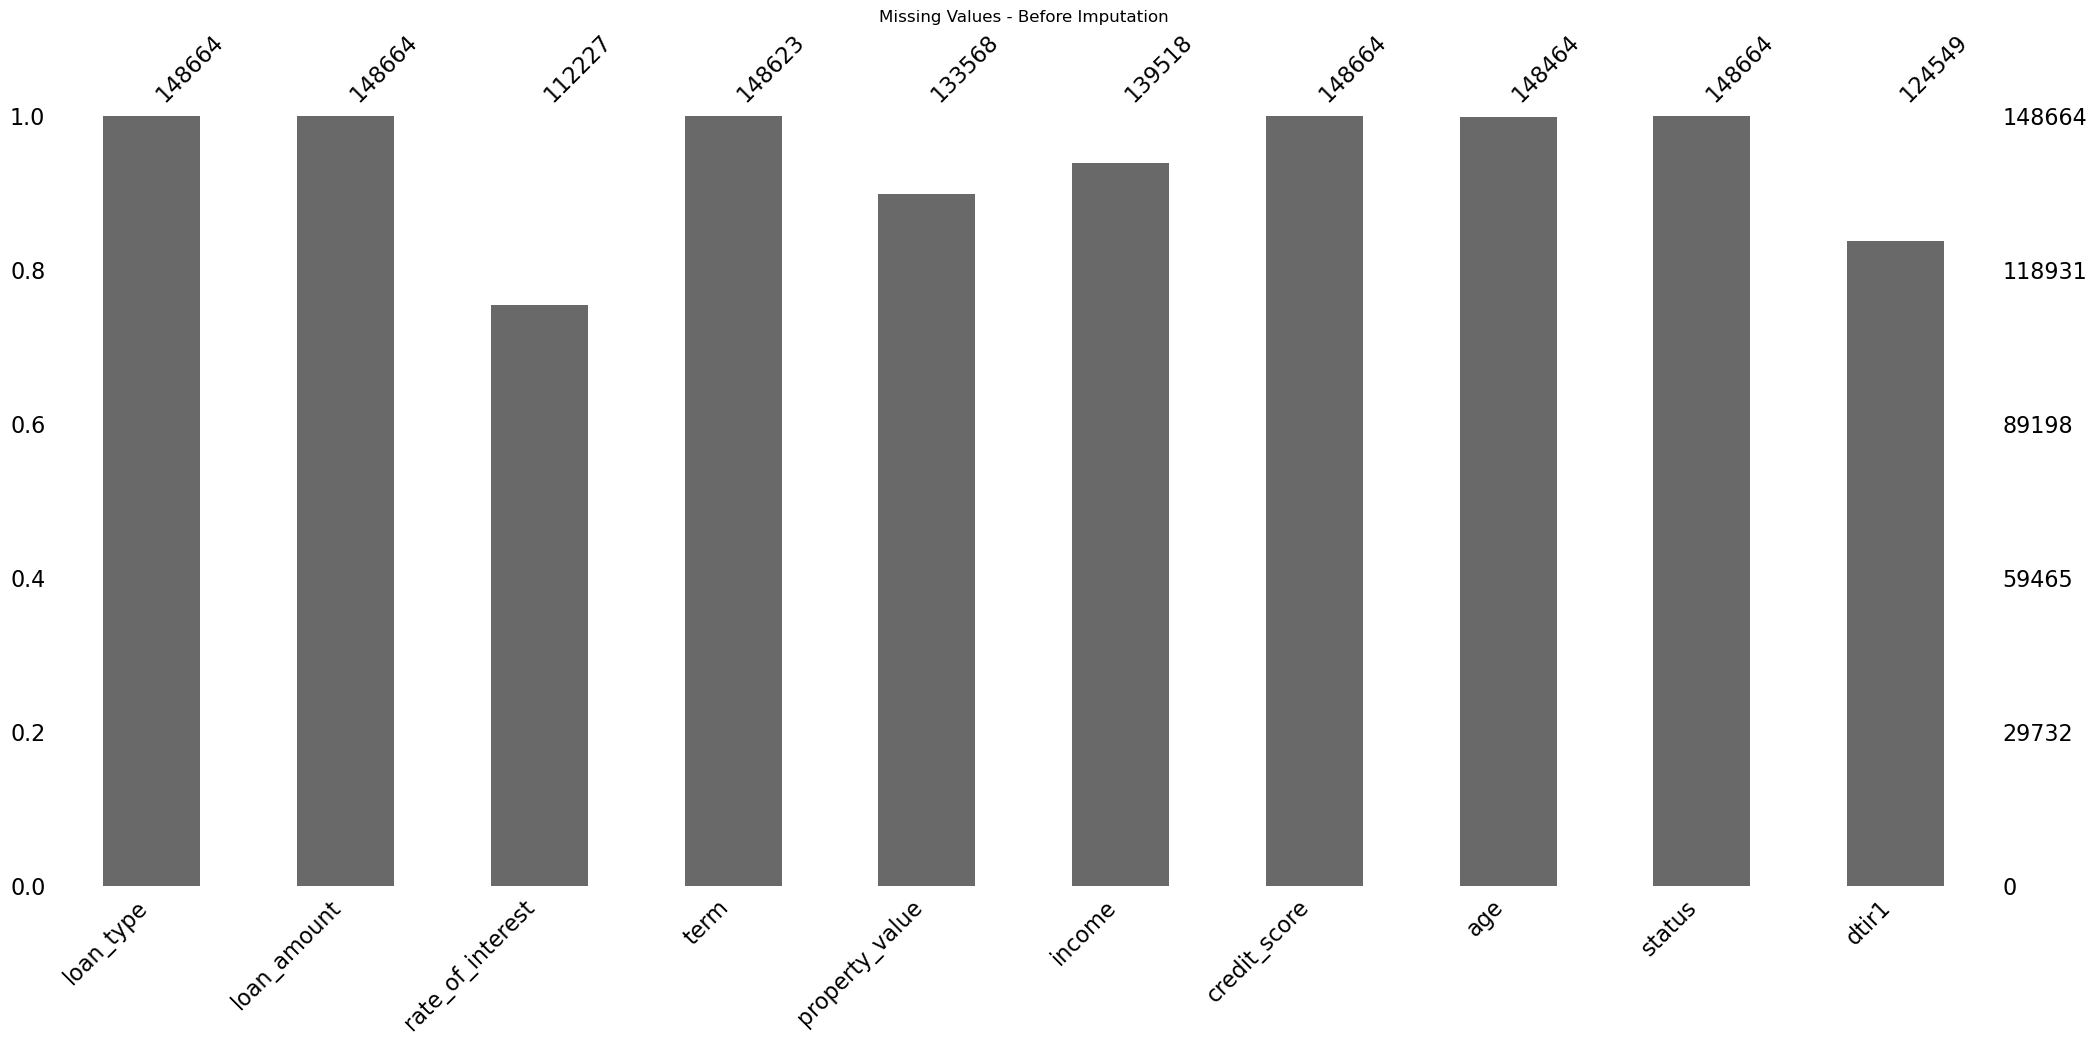

In [17]:
# Bar plot of missing values
msno.bar(df)
plt.title("Missing Values - Before Imputation")
plt.show()

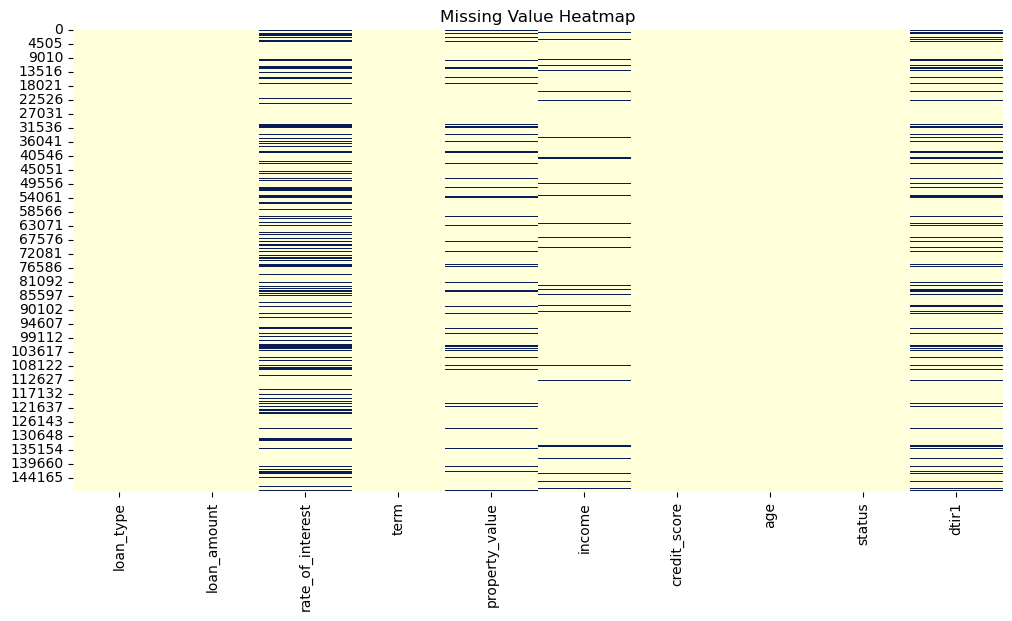

In [18]:
# Heatmap of missing structure
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Value Heatmap")
plt.show()

## Separate Columns by Type

In [19]:
# Separate features from target
target = 'status'

# Separate X and y
X = df.drop(columns=[target], axis= 1)
y = df[target]

# Get column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

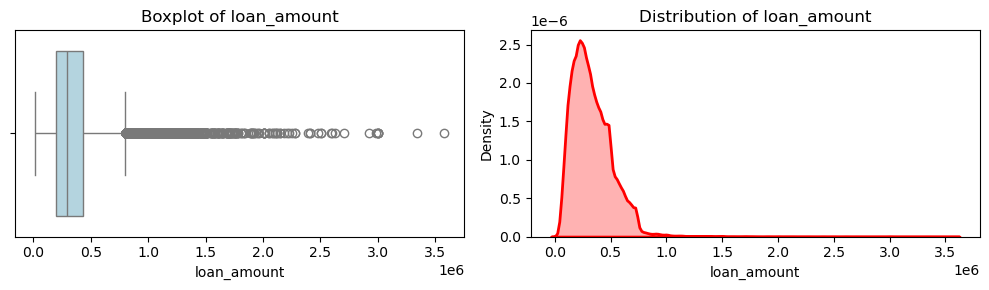

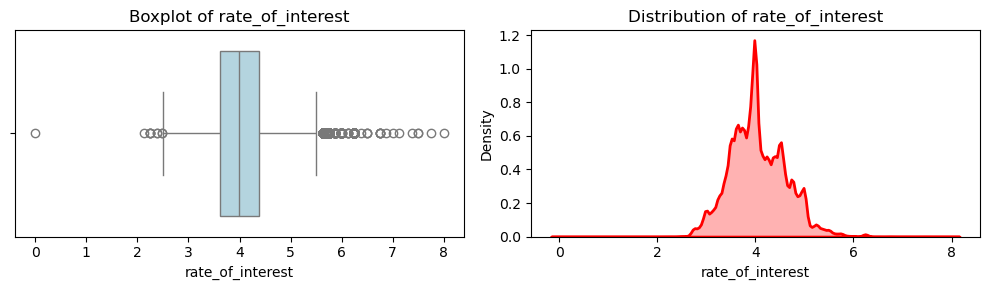

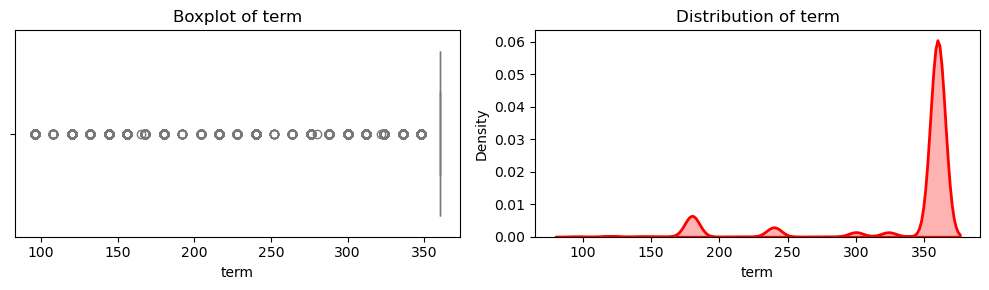

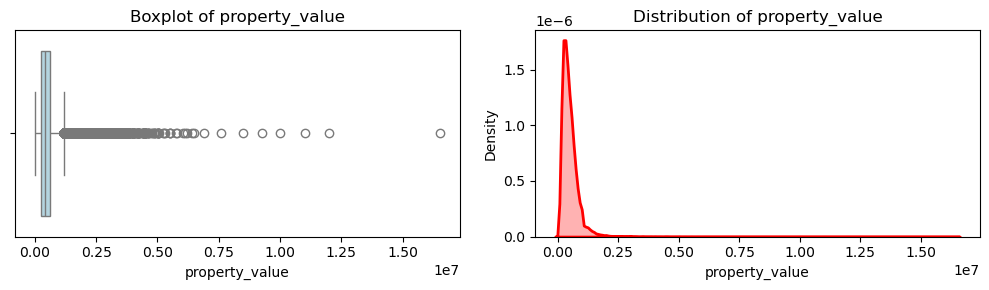

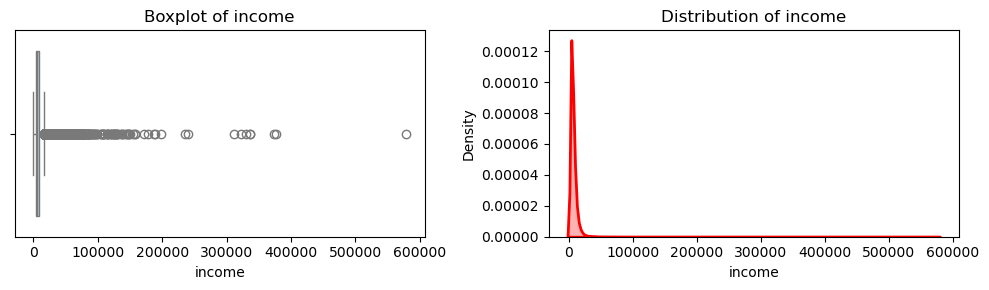

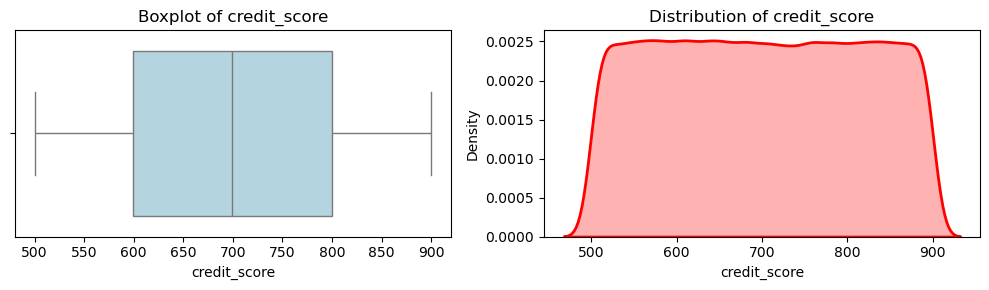

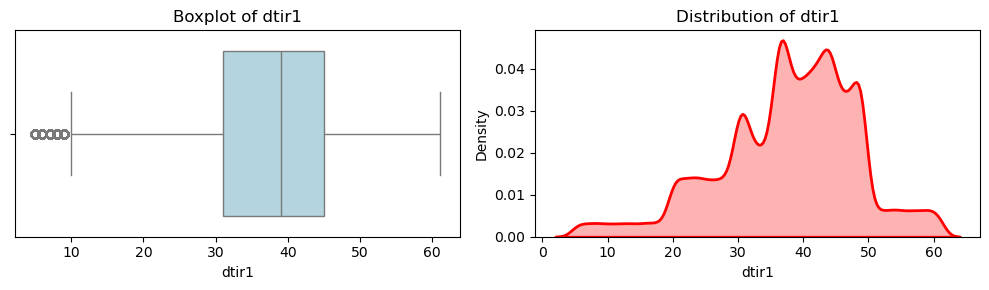

In [20]:
# Loop through numerical columns and plot
for col in numerical_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

    # Boxplot (outliers)
    sns.boxplot(data=df, x=col, ax=axes[0], color='lightblue')
    axes[0].set_title(f'Boxplot of {col}', fontsize=12)

    # KDE Plot
    sns.kdeplot(data=df, x=col, ax=axes[1], color='red', linewidth=2, fill=True, alpha=0.3)
    axes[1].set_title(f'Distribution of {col}', fontsize=12)

    plt.tight_layout()
    plt.show()

## Split Dataset

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (118931, 9)
Shape of y_train:  (118931,)
Shape of X_test:  (29733, 9)
Shape of y_test:  (29733,)


## Missing Value Imputation (Numerical + Categorical)

In [22]:
from sklearn.impute import SimpleImputer

# Numerical imputer
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[numerical_cols])
X_train[numerical_cols] = num_imputer.transform(X_train[numerical_cols])
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

# Categorical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(X_train[categorical_cols])
X_train[categorical_cols] = cat_imputer.transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])


In [23]:
# Check missing values in training data
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Check test data too
print("\nMissing values in X_test:")
print(X_test.isnull().sum())

Missing values in X_train:
loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
dtir1               0
dtype: int64

Missing values in X_test:
loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
dtir1               0
dtype: int64


## Encoding Categorical Features

In [24]:
from sklearn.preprocessing import OneHotEncoder
import re

#Identifying current categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

#Applying OneHotEncoder
if categorical_cols:
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Fit on training set
    X_train_encoded = pd.DataFrame(
        ohe.fit_transform(X_train[categorical_cols]),
        columns=ohe.get_feature_names_out(categorical_cols),
        index=X_train.index
    )

    # Transform test set using same encoder
    X_test_encoded = pd.DataFrame(
        ohe.transform(X_test[categorical_cols]),
        columns=ohe.get_feature_names_out(categorical_cols),
        index=X_test.index
    )

    # Drop original categorical columns
    X_train = X_train.drop(columns=categorical_cols)
    X_test = X_test.drop(columns=categorical_cols)

    # Concatenate encoded columns back
    X_train = pd.concat([X_train, X_train_encoded], axis=1)
    X_test = pd.concat([X_test, X_test_encoded], axis=1)

    # Clean column names (for XGBoost or pandas safety)
    X_train.columns = X_train.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
    X_test.columns = X_test.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)


## To save the cleaned Dataset into a CSV file

In [25]:
# Add target back to the cleaned feature set
final_df = pd.concat([X, y], axis=1)

# Save complete dataset
final_df.to_csv('Clean_Loan_Default_With_Status.csv', index=False)

## Feature Scaling (Standardization)

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Machine Learning Model Building & Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Common evaluation function
def evaluate_model(model, model_name):
    print(f"\n Results for {model_name}")
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

def evaluate_model_sc(model, model_name):
    print(f"\n Results for {model_name} with Standard Scaled Data")
    y_pred = model.predict(X_test_sc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state= 42)
logreg.fit(X_train, y_train)
evaluate_model(logreg, "Logistic Regression")


 Results for Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     22399
           1       0.34      0.00      0.00      7334

    accuracy                           0.75     29733
   macro avg       0.55      0.50      0.43     29733
weighted avg       0.65      0.75      0.65     29733

Confusion Matrix:
 [[22378    21]
 [ 7323    11]]
Accuracy Score: 0.7530017152658662
ROC AUC Score: 0.5002811608971062


In [29]:
# Train with Standard scaled Data

logreg_sc = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state= 42)
logreg_sc.fit(X_train_sc, y_train)

evaluate_model_sc(logreg_sc, "Logistic Regression")


 Results for Logistic Regression with Standard Scaled Data
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     22399
           1       0.32      0.00      0.00      7334

    accuracy                           0.75     29733
   macro avg       0.54      0.50      0.43     29733
weighted avg       0.65      0.75      0.65     29733

Confusion Matrix:
 [[22376    23]
 [ 7323    11]]
Accuracy Score: 0.7529344499377796
ROC AUC Score: 0.5002365160468896


## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dtree.fit(X_train, y_train)

evaluate_model(dtree, "Decision Tree")


 Results for Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     22399
           1       0.79      0.85      0.82      7334

    accuracy                           0.91     29733
   macro avg       0.87      0.89      0.88     29733
weighted avg       0.91      0.91      0.91     29733

Confusion Matrix:
 [[20765  1634]
 [ 1067  6267]]
Accuracy Score: 0.9091581744189957
ROC AUC Score: 0.8907817704082757


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

evaluate_model(rf, "Random Forest")


 Results for Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     22399
           1       0.86      0.78      0.81      7334

    accuracy                           0.91     29733
   macro avg       0.89      0.87      0.88     29733
weighted avg       0.91      0.91      0.91     29733

Confusion Matrix:
 [[21437   962]
 [ 1632  5702]]
Accuracy Score: 0.9127568694716308
ROC AUC Score: 0.8672632145560767


## XGBoost Classifier

In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, subsample=0.8, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

evaluate_model(xgb, "XGBoost")


 Results for XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95     22399
           1       0.82      0.88      0.85      7334

    accuracy                           0.92     29733
   macro avg       0.89      0.91      0.90     29733
weighted avg       0.92      0.92      0.92     29733

Confusion Matrix:
 [[20942  1457]
 [  873  6461]]
Accuracy Score: 0.921635892779067
ROC AUC Score: 0.9079589100096787


### Model Accuracy Scores (on Test Set)

| Model                          | Accuracy | ROC AUC | Recall (Defaulters) |
|-------------------------------|----------|---------|----------------------|
| Logistic Regression            | 75.31%   | 0.5004  | 0.00                 |
| Logistic Regression (Scaled)  | 75.29%   | 0.5002  | 0.00                 |
| Decision Tree Classifier       | 90.91%   | 0.8908  | 0.85                 |
| Random Forest Classifier       | 91.28%   | 0.8673  | 0.78                 |
| **XGBoost Classifier**         | **92.04%** | **0.9071** | **0.88**         |

**Observation**:
- Logistic Regression struggles to detect defaulters despite high overall accuracy due to class imbalance.
- Tree-based models like Decision Tree and Random Forest perform much better.
- **XGBoost provides the best balance of accuracy, recall, and AUC**, making it the most suitable model for deployment or decision-making.


## Confusion Matrices

The confusion matrices below show how each model performs in classifying defaulters (1) vs non-defaulters (0).

- **True Negatives (TN)**: Top-left
- **False Positives (FP)**: Top-right
- **False Negatives (FN)**: Bottom-left (missed defaulters)
- **True Positives (TP)**: Bottom-right

Minimizing **False Negatives (FN)** is critical in loan default prediction to avoid risky approvals.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


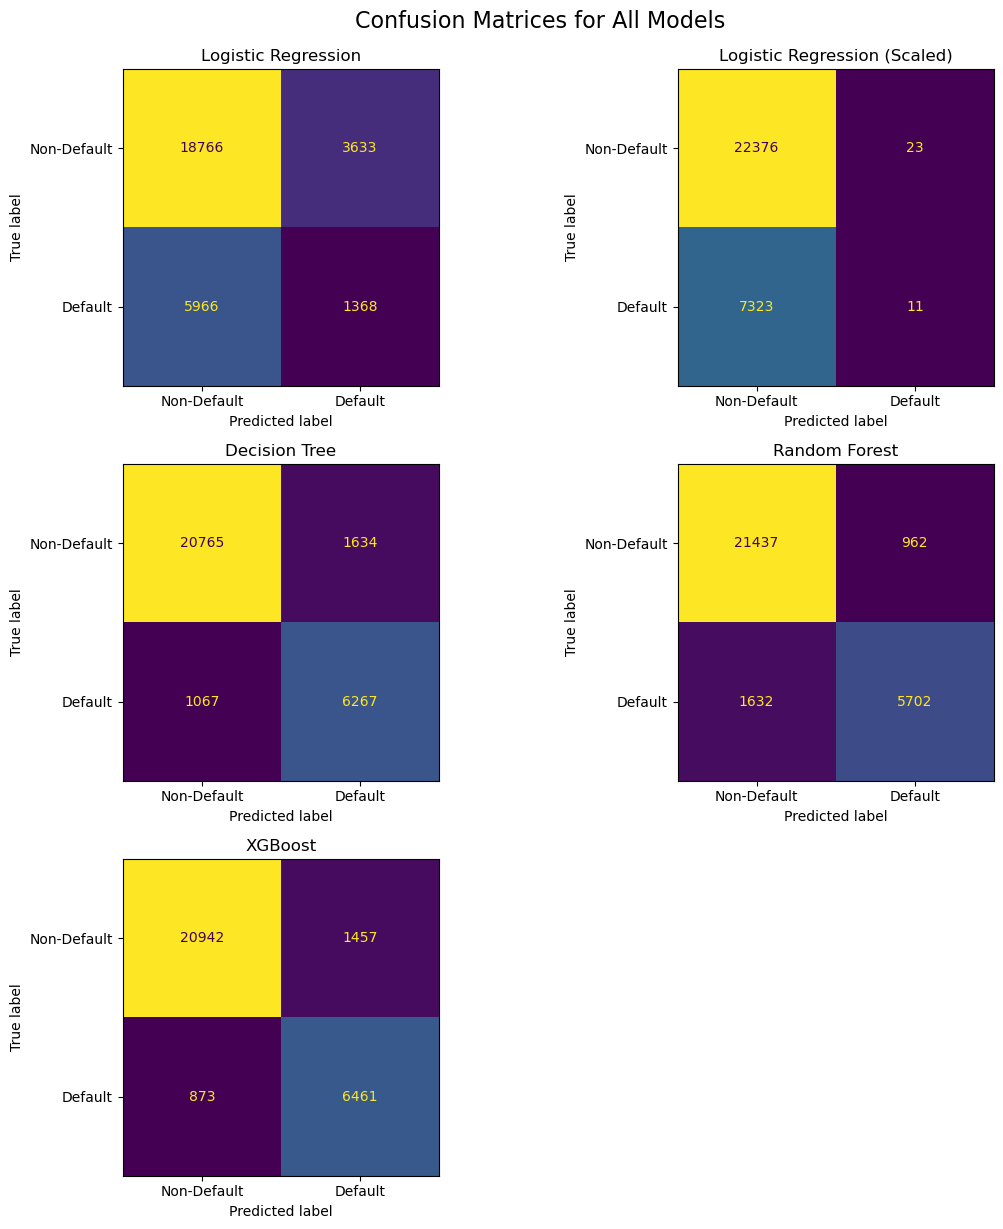

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models and their names
models = {
    "Logistic Regression": logreg,        # your unscaled logistic model
    "Logistic Regression (Scaled)": logreg_sc, # scaled one
    "Decision Tree": dtree,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Data to use
X_scaled_test = X_test_sc
X_unscaled_test = X_test

# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    # Choose scaled or unscaled input
    if 'Scaled' in name or name == "Logistic Regression":
        X_input = X_scaled_test
    else:
        X_input = X_unscaled_test

    # Predict and get confusion matrix
    y_pred = model.predict(X_input)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(name)

# Hide unused subplot (last one if only 5 models)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", fontsize=16, y=1.02)
plt.show()

## Cross-validation of ML Model

In [34]:
from sklearn.model_selection import cross_val_score

cross_validation_logreg = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10)
cross_validation_logreg_sc = cross_val_score(estimator = logreg_sc, X = X_train_sc, y = y_train, cv = 10)
cross_validation_dtree = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)
cross_validation_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
cross_validation_xgb = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)



print("Cross validation accuracy of Logistic Regression model = ", cross_validation_logreg)
print("\nCross validation mean accuracy of Logistic Regression model = ", cross_validation_logreg.mean())

print("\nCross validation accuracy of Logistic Regression model with Scaled data = ", cross_validation_logreg_sc)
print("\nCross validation mean accuracy of Logistic Regression with Scaled data model = ", cross_validation_logreg_sc.mean())

print("\nCross validation accuracy of Decision Tree Classification model = ", cross_validation_dtree)
print("\nCross validation mean accuracy of Decision Tree Classification model = ", cross_validation_dtree.mean())

print("\nCross validation accuracy of Random Forest Classification model = ", cross_validation_rf)
print("\nCross validation mean accuracy of Random Forest Classification model = ", cross_validation_rf.mean())

print("\nCross validation accuracy of XGBoost Classification model = ", cross_validation_xgb)
print("\nCross validation mean accuracy of XGBoost Classification model = ", cross_validation_xgb.mean())

Cross validation accuracy of Logistic Regression model =  [0.75399361 0.75296393 0.75372068 0.75363659 0.75338434 0.75388884
 0.75388884 0.75355251 0.75355251 0.75372068]

Cross validation mean accuracy of Logistic Regression model =  0.7536302531437802

Cross validation accuracy of Logistic Regression model with Scaled data =  [0.75399361 0.75279576 0.75372068 0.75363659 0.75338434 0.75380476
 0.75388884 0.75355251 0.75355251 0.75355251]

Cross validation mean accuracy of Logistic Regression with Scaled data model =  0.7535882116067416

Cross validation accuracy of Decision Tree Classification model =  [0.90970237 0.90969478 0.90725637 0.90431346 0.90683595 0.90649962
 0.90565879 0.90624737 0.90683595 0.90557471]

Cross validation mean accuracy of Decision Tree Classification model =  0.9068619380949219

Cross validation accuracy of Random Forest Classification model =  [0.91062721 0.90885395 0.90616329 0.91036744 0.9130581  0.91019928
 0.91095602 0.91070378 0.91246952 0.91179686]

Cr

### Cross-Validation Results (10-Fold)

We used 10-fold cross-validation to evaluate the generalization performance of all models.

| Model                          | Mean Accuracy |
|-------------------------------|----------------|
| Logistic Regression            | 0.7536         |
| Logistic Regression (Scaled)  | 0.7536         |
| Decision Tree Classifier       | 0.9069         |
| Random Forest Classifier       | 0.9105         |
| **XGBoost Classifier**         | **0.9176**     |

The results confirm that XGBoost outperforms all other models in terms of accuracy, generalization, and class discrimination.


## Final Model Comparison Visualizations

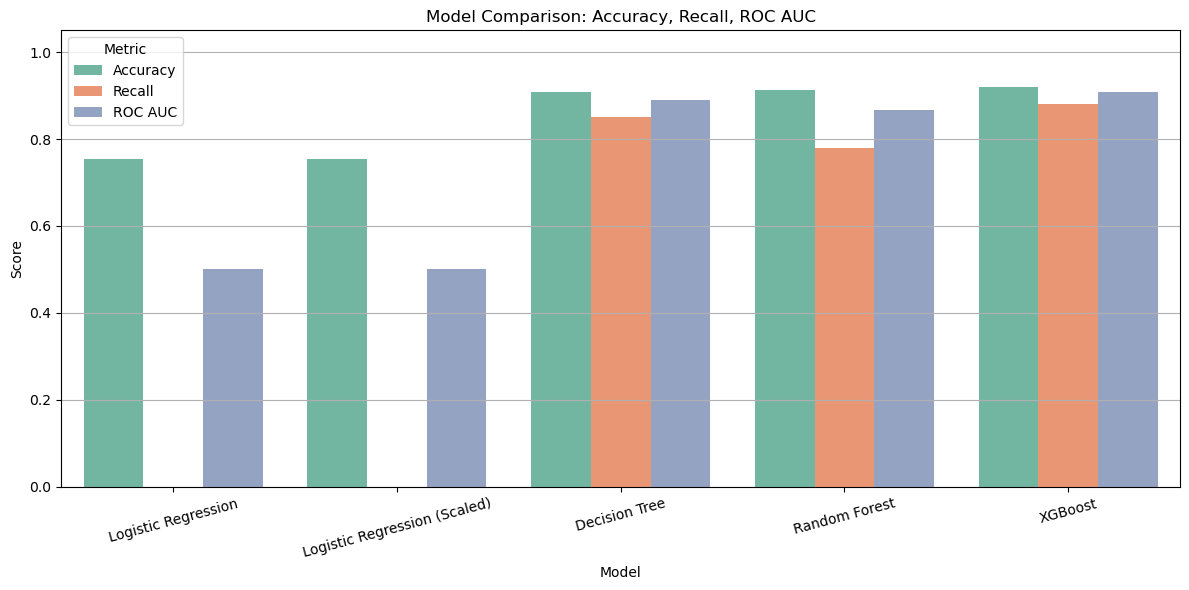

In [35]:
model_results = {
    'Model': ['Logistic Regression', 'Logistic Regression (Scaled)', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.7531, 0.7529, 0.9091, 0.9128, 0.9204],
    'Recall': [0.00, 0.00, 0.85, 0.78, 0.88],
    'ROC AUC': [0.5004, 0.5002, 0.8908, 0.8673, 0.9071]
}

df_scores = pd.DataFrame(model_results)

# Melt for seaborn
df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set2')
plt.title('Model Comparison: Accuracy, Recall, ROC AUC')
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Conclusion

In this project, we developed and evaluated multiple machine learning models to predict loan default using real-world financial data. The objective was to accurately identify high-risk borrowers based on factors such as credit score, income, loan amount, property value, and debt-to-income ratio.

We followed a structured pipeline:
- Cleaned and imputed missing values
- Dropped features prone to data leakage
- Performed data visualization to understand distributions and outliers
- Trained and evaluated multiple classification models
- Used 10-fold cross-validation for robust performance estimation

**Key Findings:**
- Logistic Regression performed poorly in identifying defaulters (Recall = 0), despite decent overall accuracy (~75%), mainly due to class imbalance and linearity assumptions.
- Tree-based models like Decision Tree and Random Forest showed significant improvement, especially in recall and ROC-AUC.
- **XGBoost emerged as the best model**, achieving:
  - **Accuracy**: 92.04%
  - **Recall (Defaulters)**: 88%
  - **ROC AUC**: 0.91

**Final Choice**: XGBoost is the most effective model for this task, as it balances precision and recall, handles class imbalance well, and captures complex non-linear patterns in the data.

---

This model can assist financial institutions in better risk assessment and decision-making, potentially reducing loan defaults and improving credit strategy.


<h4 align="center">***End of Project***</h4>


---